<a href="https://colab.research.google.com/github/michael1017/CS551-WASM-On-Cloud/blob/master/Test/Average_Latency_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/michael1017/CS551-WASM-On-Cloud.git
!cd CS551-WASM-On-Cloud
!pwd
!ls -l


Cloning into 'CS551-WASM-On-Cloud'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 235 (delta 40), reused 114 (delta 27), pack-reused 105
Receiving objects: 100% (235/235), 68.08 MiB | 20.62 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content
total 8
drwxr-xr-x 7 root root 4096 Nov 29 22:26 CS551-WASM-On-Cloud
drwxr-xr-x 1 root root 4096 Nov 28 14:27 sample_data


/content/CS551-WASM-On-Cloud/Test
https://newtestresnet.azurewebsites.net/api/httptrigger?code=ZrcylRyiNsbpXhkGnrPxideuF-QFwGh2e_iYlRqc3qBiAzFu3wfK_Q%3D%3D
1.300434623000001
1.3109159511999962
1.347830186850004
1.2325725800666703
1.4480972334749993
1.4165720447800028
1.315065891349999
[(1, 1.300434623000001), (10, 1.3109159511999962), (20, 1.347830186850004), (30, 1.2325725800666703), (40, 1.4480972334749993), (50, 1.4165720447800028), (100, 1.315065891349999)]


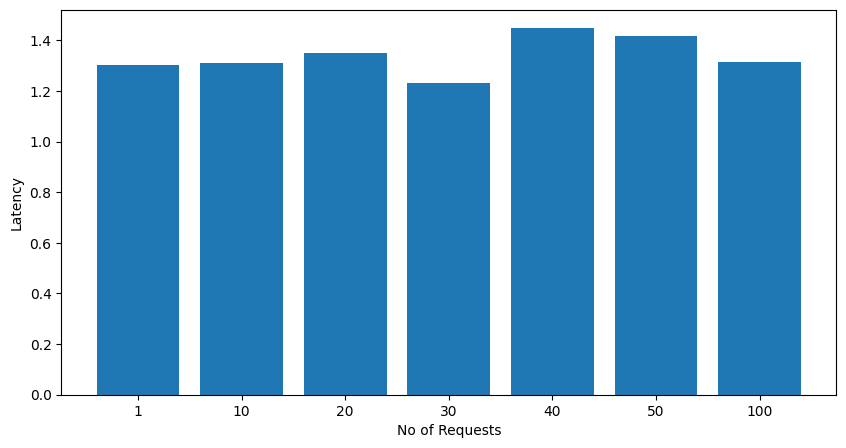

In [4]:
# Latency test
# Curl request (100) avg time
%cd CS551-WASM-On-Cloud/Test/
import random
import requests
import binascii
from time import perf_counter
import os
import base64
import numpy as np
import matplotlib.pyplot as plt


plot_points = []
def convert_image_to_base64(file_name):
    base64_img = ""
    with open(file_name, 'rb') as img_file:
        # Read the image file
        img_data = img_file.read()
        # Encode image data to base64 string
        base64_img = base64.b64encode(img_data).decode('utf-8')
    return base64_img

def convert_image_to_hex(file_name):
    hex_value = ""
    with open(file_name, 'rb') as f:
        content = f.read()
    hex_value = str(binascii.hexlify(content), encoding="utf-8")
    return hex_value

def test_latency(num_requests, url_link):
    avg_latency = 0
    image_list = []
    times = []
    for (dir_path, dir_names, file_names) in os.walk("Images"):
        for file_name in file_names:
            file_path = dir_path + "/" + file_name
            if is_base64:
                image_list.append(convert_image_to_base64(file_path))
            else:
                image_list.append(convert_image_to_hex(file_path))

    for _ in range(num_requests):
        image_object = random.choice(image_list)
        # DO NOT DELETE
        # query = f"curl -X POST {url_link} -d {image_object}"
        # os.system(query)
        start = perf_counter()
        # FOR GCP AND AZURE DO THE FOLLOWING SAME IN SCALE TEST
        # image_object = {"img": image_object}
        # response = requests.post(url_link,json=image_object)

        response = None
        if is_gcp_test:
            data = {
                "img": image_object
            }
            headers = {
                "Content-Type": "application/json"
            }
            response = requests.post(url_link, headers=headers, json=data)
        else:
            response = requests.post(url_link, data=image_object)
        # print(response.text)
        end = perf_counter()

        times.append((end - start))
        # avg_latency += (end - start)
    avg_latency = sum(times)
    # variance(times)
    avg_latency /= num_requests
    plot_points.append(avg_latency)
    print(avg_latency)
    return avg_latency


# Function Ananlysis
# Cost Analysis
# Find cost in AWS, Azure, GCP
def record_data(url_link):
    return [(num_requests, test_latency(num_requests, url_link)) for num_requests in [1, 10, 20, 30, 40, 50, 100]]


is_gcp_test = False
is_base64 = False
if __name__ == "__main__":
    # REPLACE URL with GCP and AZURE
    # url_link = "https://xb28uuj612.execute-api.us-east-2.amazonaws.com/default/aws_lambda_classify_pytorch_wasm"

    # AWS WASM
    # url_link = "https://51wrp9c8ya.execute-api.us-east-1.amazonaws.com/default/classify"

    # AZURE MOBILENET
    # url_link = "https://classifytf2.azurewebsites.net/api/classify"

    # AZURE RESNET
    url_link = "https://newtestresnet.azurewebsites.net/api/httptrigger?code=ZrcylRyiNsbpXhkGnrPxideuF-QFwGh2e_iYlRqc3qBiAzFu3wfK_Q%3D%3D"
    is_base64 = True
    is_gcp_test = True

    # GCP MOBILENET
    # url_link = "https://us-central1-curious-context-406603.cloudfunctions.net/function-1"
    # is_gcp_test = True

    print(url_link)
    print(record_data(url_link))
    num_users=['1', '10', '20', '30', '40', '50', '100']
    fig = plt.figure(figsize = (10, 5))
    plt.bar(num_users,plot_points)
    plt.ylabel("Latency")
    plt.xlabel("No of Requests")
    plt.show()
